In [143]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [144]:
covid19_deaths = pd.read_csv('Provisional_Death_Counts_for_Coronavirus_Disease__COVID-19_.csv', header=0)
covid19_deaths

,Data as of,Group,State,Indicator,Start week,End week,All COVID-19 Deaths (U07.1),Deaths from All Causes,Percent of Expected Deaths,All Pneumonia Deaths (J12.0-J18.9),Deaths with Pneumonia and COVID-19 (J12.0-J18.9 and U07.1),All Influenza Deaths (J09-J11),"Pneumonia, Influenza, and COVID-19 Deaths",Footnote
0,04/30/2020,By week,United States,Total Deaths,02/01/2020,04/25/2020,34521.0,713386,0.97,62725,15301.0,5821.0,86973.0,NaN
1,04/30/2020,By week,United States,Week-ending,02/01/2020,02/01/2020,0.0,57263,0.97,3687,0.0,469.0,4156.0,NaN
2,04/30/2020,By week,United States,Week-ending,02/08/2020,02/08/2020,0.0,57613,0.97,3671,0.0,494.0,4165.0,NaN
3,04/30/2020,By week,United States,Week-ending,02/15/2020,02/15/2020,0.0,56871,0.97,3692,0.0,516.0,4208.0,NaN
4,04/30/2020,By week,United States,Week-ending,02/22/2020,02/22/2020,0.0,56795,0.98,3556,0.0,536.0,4092.0,NaN
5,04/30/2020,By week,United States,Week-ending,02/29/2020,02/29/2020,5.0,56831,0.99,3620,3.0,619.0,4241.0,NaN
6,04/30/2020,By week,United States,Week-ending,03/07/2020,03/07/2020,25.0,56190,0.97,3719,14.0,583.0,4312.0,NaN
7,04/30/2020,By week,United States,Week-ending,03/14/2020,03/14/2020,49.0,53940,0.95,3674,25.0,578.0,4275.0,NaN
8,04/30/2020,By week,United States,Week-ending,03/21/2020,03/21/2020,487.0,53924,0.95,4138,224.0,495.0,4890.0,NaN
9,04/30/2020,By week,United States,Week-ending,03/28/2020,03/28/2020,2659.0,57299,1.03,5598,1220.0,407.0,7397.0,NaN


In [145]:
covid19_deaths.Group.value_counts(dropna=False)

By state             54
By week              14
By age               12
By place of death     9
By sex                4
Name: Group, dtype: int64

In [146]:
bystate = covid19_deaths[covid19_deaths['Group']=='By state']
total_covid_deaths_bystate = bystate[['State', 'All COVID-19 Deaths (U07.1)']]
total_covid_deaths_bystate[total_covid_deaths_bystate['All COVID-19 Deaths (U07.1)'].isnull()]

,State,All COVID-19 Deaths (U07.1)
28,Alaska,NaN
38,Hawaii,NaN
53,Montana,NaN
62,North Dakota,NaN
69,South Dakota,NaN
78,Wyoming,NaN


In [147]:
total_covid_deaths_bystate_fillNA=total_covid_deaths_bystate[['State','All COVID-19 Deaths (U07.1)']].fillna(value=0)

In [148]:
total_covid_deaths_bystate_fillNA[total_covid_deaths_bystate_fillNA['All COVID-19 Deaths (U07.1)'].isnull()]

,State,All COVID-19 Deaths (U07.1)


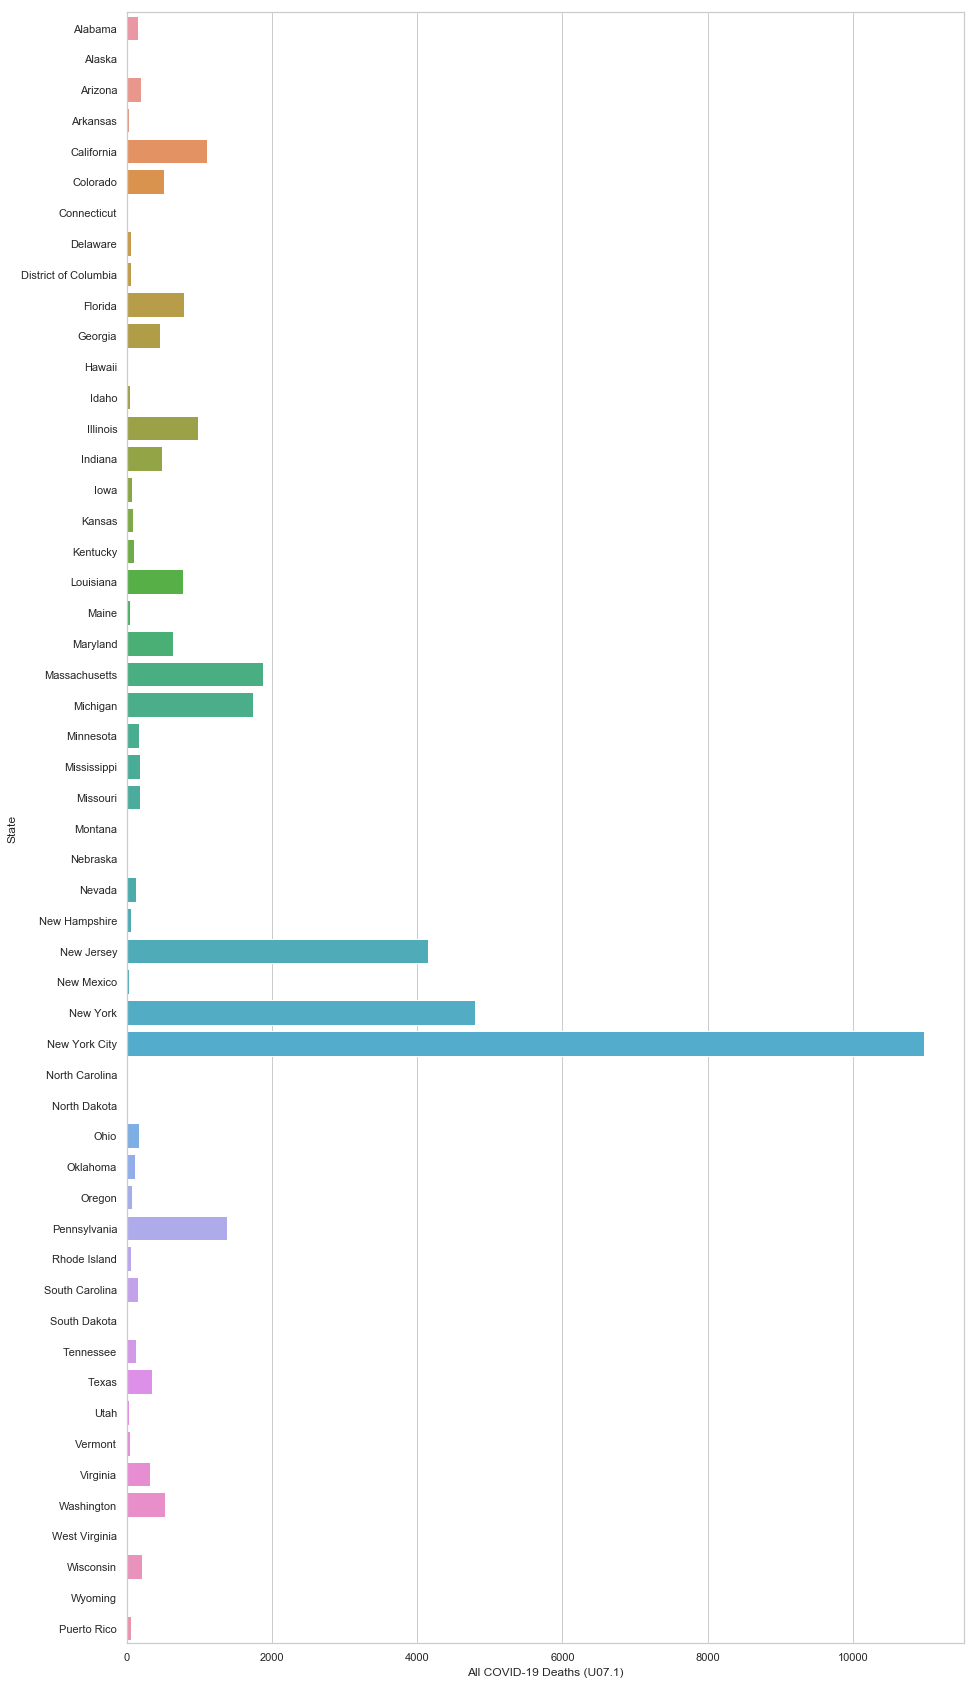

In [149]:
total_covid_deaths_bystate_fillNA.set_index('State', inplace=True)
dropUS= total_covid_deaths_bystate_fillNA.drop(['United States'])

sns.set(style="whitegrid")
plt.figure(figsize=(15,30))
g= sns.barplot(x="All COVID-19 Deaths (U07.1)", y=dropUS.index, data=dropUS)

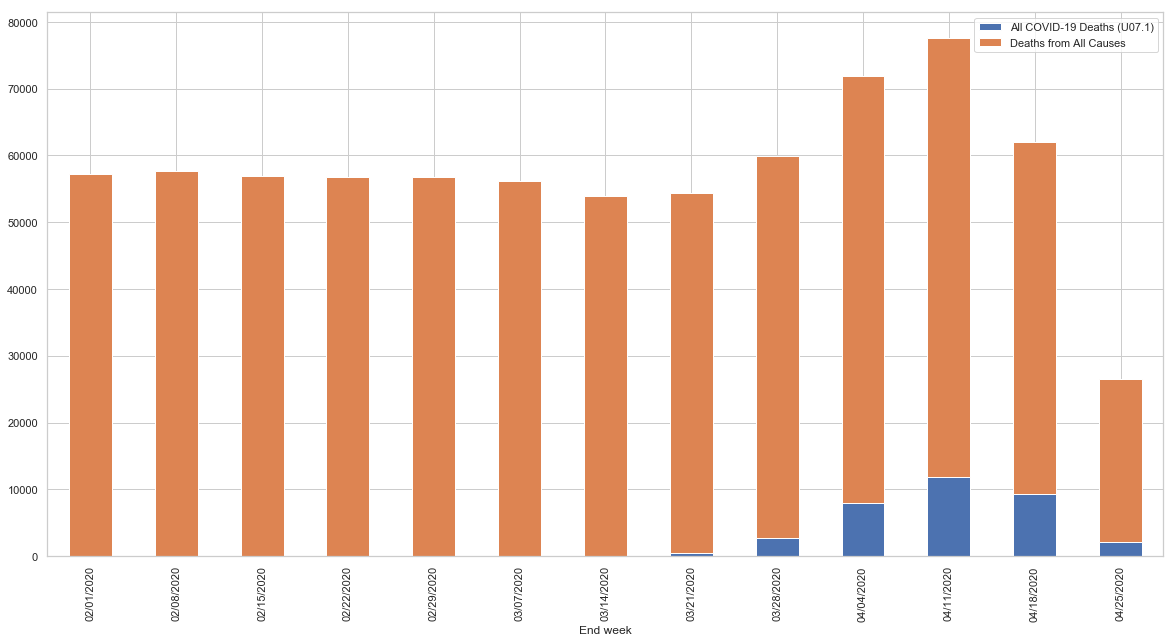

In [150]:
byweek = covid19_deaths[covid19_deaths['Group']=='By week']
byweekClean = byweek[['End week', 'All COVID-19 Deaths (U07.1)', 'Deaths from All Causes']]
byweekCleaner=byweekClean.drop([0])
byweekCleaner.set_index('End week', inplace=True)
byweekCleaner.plot(kind='bar', stacked=True, figsize=(20,10))

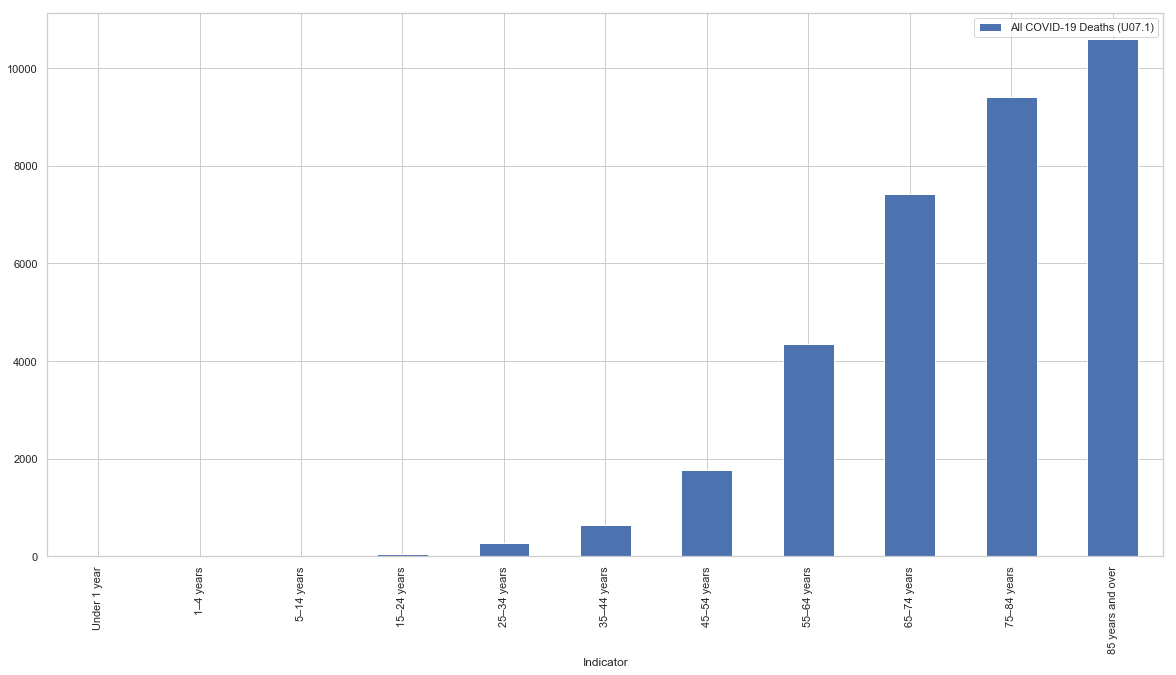

In [151]:
byage= covid19_deaths[covid19_deaths['Group']=='By age']
byageClean= byage[['Indicator', 'All COVID-19 Deaths (U07.1)']]
byageCleaner= byageClean.drop([14])
byageCleaner.set_index('Indicator', inplace=True)
byageCleaner.plot(kind='bar',figsize=(20,10))

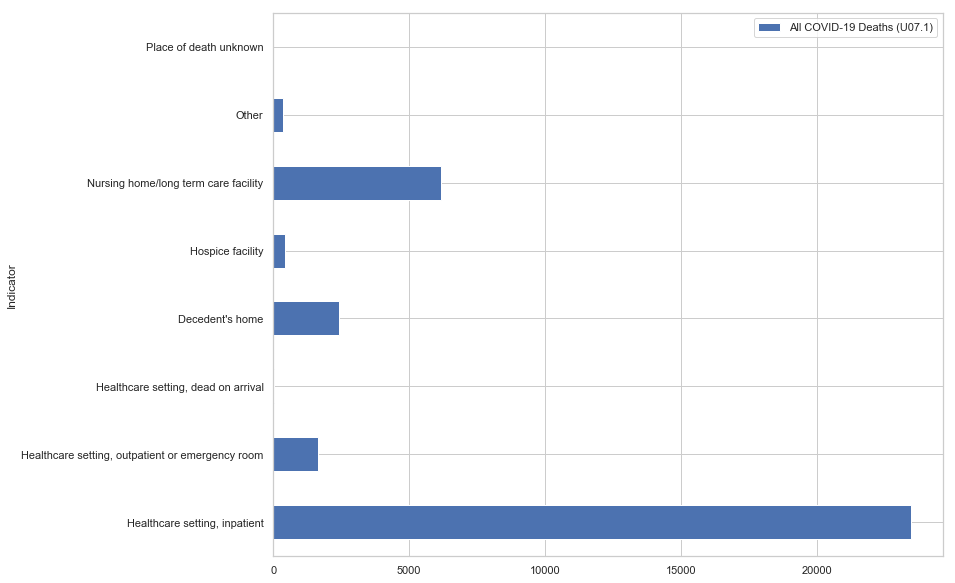

In [152]:
byplaceofdeath = covid19_deaths[covid19_deaths['Group']=='By place of death']
byplaceofdeathClean= byplaceofdeath[['Indicator', 'All COVID-19 Deaths (U07.1)']]
byplaceofdeathClean.set_index('Indicator', inplace=True)
byplaceofdeathCleaner = byplaceofdeathClean.drop(['Total'])
byplaceofdeathCleaner.plot(kind='barh',figsize=(12,10))

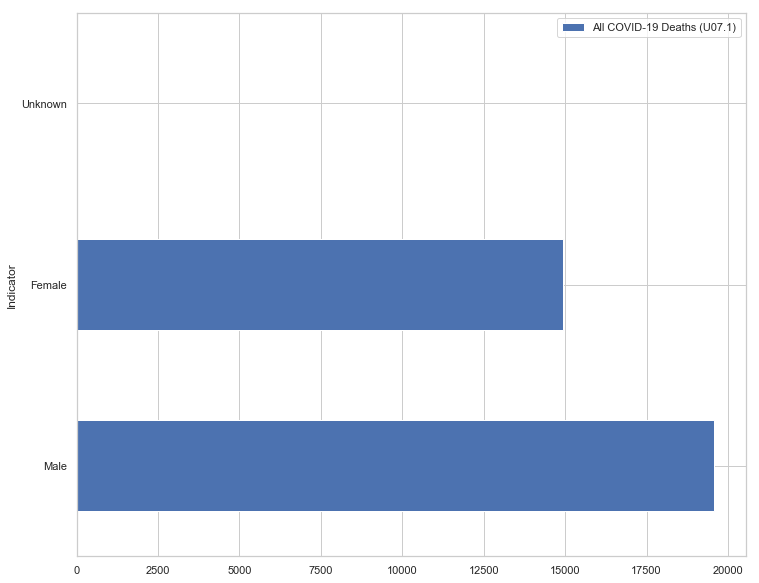

In [153]:
bysex = covid19_deaths[covid19_deaths['Group']=='By sex']
bysexClean = bysex[['Indicator', 'All COVID-19 Deaths (U07.1)']]
bysexClean.set_index('Indicator', inplace=True)
bysexCleaner= bysexClean.drop('Total deaths')
bysexCleaner.plot(kind='barh',figsize=(12,10))

In [154]:
NYStateCovidTest = pd.read_csv('https://health.data.ny.gov/resource/xdss-u53e.csv')
NYStateCovidTest

,test_date,county,new_positives,cumulative_number_of_positives,total_number_of_tests,cumulative_number_of_tests
0,2020-05-12T00:00:00.000,Albany,15,1494,335,15246
1,2020-05-12T00:00:00.000,Allegany,2,44,39,885
2,2020-05-12T00:00:00.000,Bronx,236,41677,2678,124133
3,2020-05-12T00:00:00.000,Broome,3,382,291,5803
4,2020-05-12T00:00:00.000,Cattaraugus,0,61,77,1574
5,2020-05-12T00:00:00.000,Cayuga,0,60,45,1312
6,2020-05-12T00:00:00.000,Chautauqua,1,43,125,1916
7,2020-05-12T00:00:00.000,Chemung,1,132,282,3112
8,2020-05-12T00:00:00.000,Chenango,0,112,83,1713
9,2020-05-12T00:00:00.000,Clinton,1,78,53,1235


In [155]:
#Lets change test_date to datetime object
NYStateCovidTest['test_date']= pd.to_datetime(NYStateCovidTest['test_date']).dt.strftime("%m/%d/%y")
#select our columns
NYStateCovidTestClean= NYStateCovidTest[['test_date','county','cumulative_number_of_positives']]
NYStateCovidTestClean.set_index('test_date', inplace=True)
#select a prticulr date to match our other data set that only goes to 4/30/20
NYStateCovidTestClean_4_30_20 = NYStateCovidTestClean.loc['04/30/20']

graf = NYStateCovidTestClean_4_30_20.set_index('county')

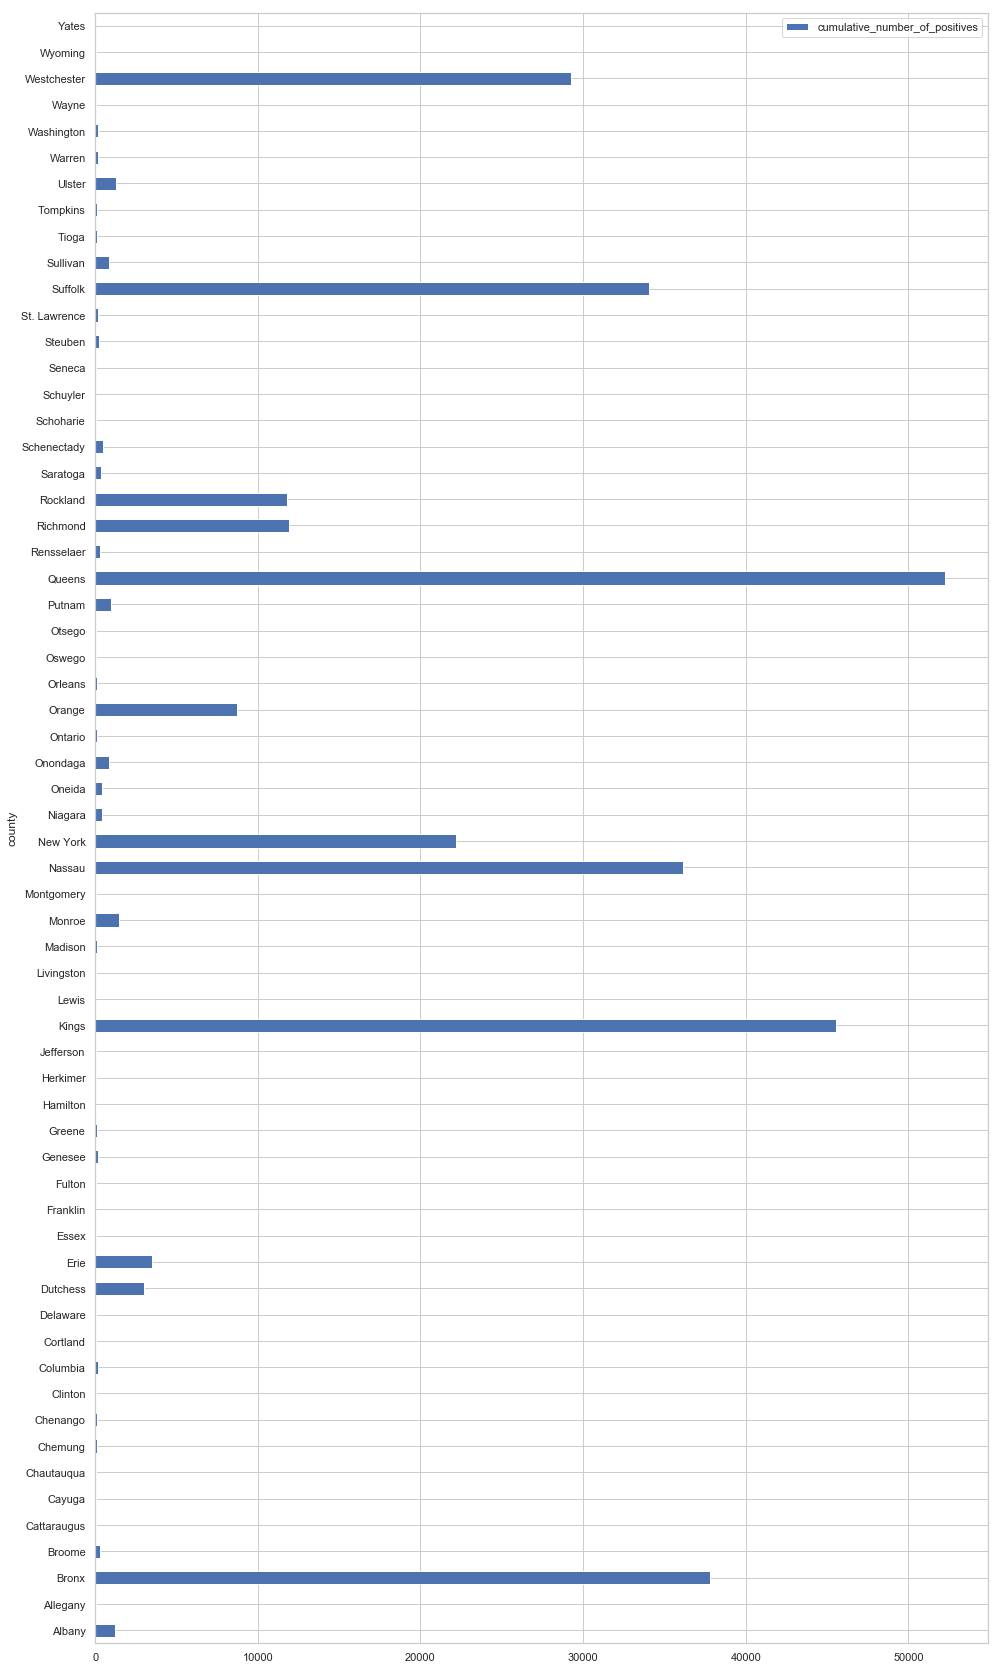

In [156]:

graf.plot(kind='barh', figsize=(16, 30))